# **Entrenamiento de Modelos**

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV

import urllib.request
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
RANDOM_STATE = 10

## **Carga de datos pretratados**

In [4]:
X = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/preprocessed-data/final/train-preprocessed.p").read()
    )
y = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/preprocessed-data/final/test-preprocessed.p").read()
    )

## **Data split**

A continuación se divide la data en dos subconjuntos: uno para entrenamiento y otro para validación. Se decidió usar un ratio de 80%-20%

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

## **Regresión Logística**

In [ ]:
reg_model = LogisticRegression(random_state=RANDOM_STATE).fit(X, y)
y_pred = reg_model.predict(X_test)
y_pred_proba = reg_model.predict_proba(X_test)[:,1]

**Guardando los resultados**

In [ ]:
with open("regression-pred.p", "wb") as file:
    pickle.dump(y_pred, file)

with open("regression-pred-proba.p", "wb") as file:
    pickle.dump(y_pred_proba, file)

## **Árbol de clasificación**

Para este tipo de modelo, se decidió iterar un RandomForestClassifier variando los parámetros `` y `` y usando Cross Validation con 5 KFolds.

In [ ]:
rf_classifier = RandomForestClassifier(random_state=RANDOM_STATE)

param_grid = {'n_estimators': np.linspace(200, 500, 5, dtype=int), 'max_depth': np.linspace(14, 30, 8, dtype=int)}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': array([14, 16, 18, 20, 23, 25, 27, 30]),
                         'n_estimators': array([200, 275, 350, 425, 500])})

In [ ]:
grid_search.best_params_

{'max_depth': 18, 'n_estimators': 350}

In [ ]:
gs_res = pd.DataFrame.from_dict(grid_search.cv_results_)
gs_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.231600,0.420200,0.158409,0.011365,14,200,"{'max_depth': 14, 'n_estimators': 200}",0.829144,0.829679,0.830481,0.835027,0.825087,0.829884,0.003175,39
1,4.482133,0.433520,0.223641,0.022317,14,275,"{'max_depth': 14, 'n_estimators': 275}",0.828877,0.830481,0.829412,0.834225,0.825087,0.829616,0.002936,40
2,5.722979,0.481027,0.270990,0.010950,14,350,"{'max_depth': 14, 'n_estimators': 350}",0.828877,0.830749,0.830214,0.835829,0.825889,0.830312,0.003233,36
3,6.848095,0.338829,0.334393,0.053051,14,425,"{'max_depth': 14, 'n_estimators': 425}",0.829144,0.830749,0.830214,0.835561,0.825889,0.830312,0.003120,36
4,8.159190,0.401270,0.405093,0.048398,14,500,"{'max_depth': 14, 'n_estimators': 500}",0.829947,0.831818,0.829947,0.836096,0.826424,0.830846,0.003152,31
5,3.527104,0.191671,0.178182,0.018154,16,200,"{'max_depth': 16, 'n_estimators': 200}",0.831551,0.833155,0.831818,0.833422,0.826959,0.831381,0.002328,30
6,4.804582,0.427539,0.251151,0.049389,16,275,"{'max_depth': 16, 'n_estimators': 275}",0.832353,0.832888,0.832086,0.832620,0.828029,0.831595,0.001803,28
7,6.278598,0.661170,0.285635,0.009745,16,350,"{'max_depth': 16, 'n_estimators': 350}",0.831551,0.835027,0.832888,0.832353,0.828296,0.832023,0.002190,23
8,7.349655,0.398632,0.368056,0.036259,16,425,"{'max_depth': 16, 'n_estimators': 425}",0.831818,0.834225,0.831818,0.832086,0.828029,0.831595,0.001999,27
9,8.868977,0.564494,0.444867,0.026258,16,500,"{'max_depth': 16, 'n_estimators': 500}",0.832620,0.835294,0.832086,0.833957,0.827227,0.832237,0.002742,18


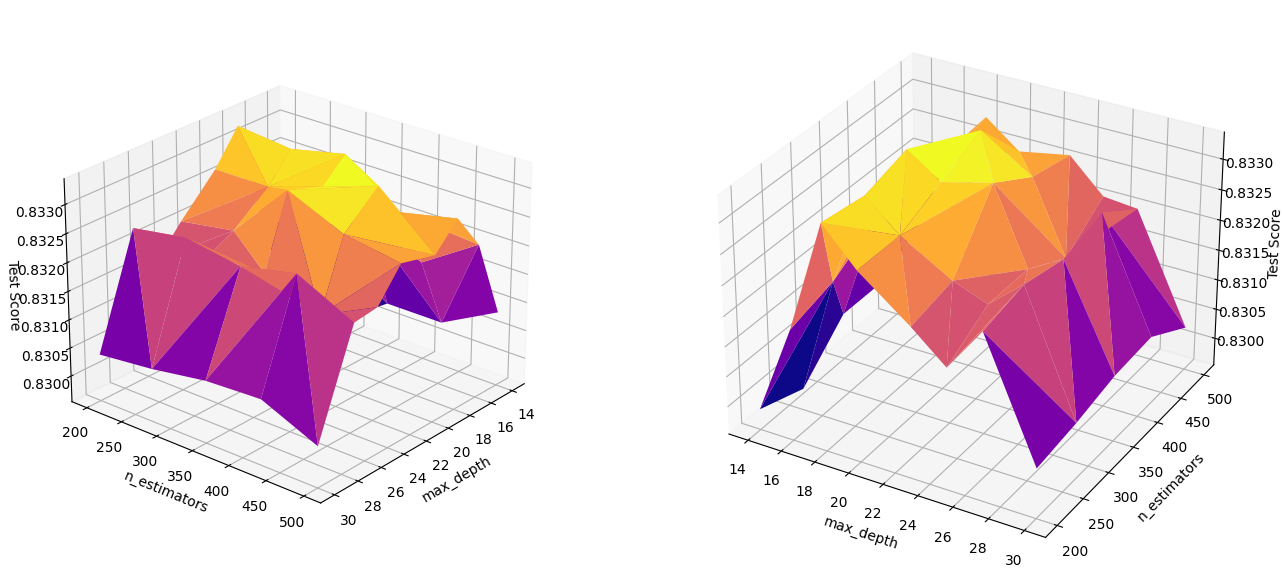

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8), subplot_kw={'projection': '3d'})

ax1.set_box_aspect(aspect=None, zoom=0.9)

x = gs_res['param_max_depth'].astype("int")
y = gs_res['param_n_estimators'].astype("int")
z = gs_res['mean_test_score']

ax1.plot_trisurf(x, y, z, linewidth=0, antialiased=True, shade=False, cmap=cm.plasma)
ax1.set_xlabel('max_depth')
ax1.set_ylabel('n_estimators')
ax1.set_zlabel("Test Score")

ax1.view_init(elev=25, azim=110)

ax2.plot_trisurf(x, y, z, linewidth=0, antialiased=True, shade=False, cmap=cm.plasma)
ax2.set_xlabel('max_depth')
ax2.set_ylabel('n_estimators')
ax2.set_zlabel("Test Score")
ax1.view_init(elev=25, azim=40)

**Mejores hiperparámetros:**

In [ ]:
grid_search.best_params_

{'max_depth': 18, 'n_estimators': 350}

In [ ]:
with open("gs.p", "wb") as file:
    pickle.dump(grid_search, file)

**Guardando los resultados del mejor modelo del GridSearch**

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:,1]

In [ ]:
with open("trees-pred.p", "wb") as file:
    pickle.dump(y_pred, file)

with open("trees-pred-proba.p", "wb") as file:
    pickle.dump(y_pred_proba, file)

## **KMeans**

In [64]:
kmeans = KMeans(n_clusters = 2, random_state=RANDOM_STATE)
kmeans.fit(X_train.astype(int).values)

KMeans(n_clusters=2, random_state=10)

In [65]:
y_pred_test = kmeans.predict(X_test.astype(int).values)

**Silhouette Score:**

In [66]:
silhouette_score(X_train.astype(int).values, kmeans.labels_)

0.5846944427112197

**Guardando la predicción de clases de KMeans:**

In [67]:
with open("kmeans-pred-train.p", "wb") as file:
    pickle.dump(y_pred_test, file)

with open("kmeans-pred-test.p", "wb") as file:
    pickle.dump(kmeans.labels_, file)